### NOTE: Neither the lines of code nor text have been proofread and some of the material have been taken directly from the OpenCV documentation

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Contours (cont'd)

**More Functions**

***Convexity Defects***

Let us return back to our aeroplane example

(<matplotlib.image.AxesImage at 0x24cd589d748>, ([], []), ([], []))

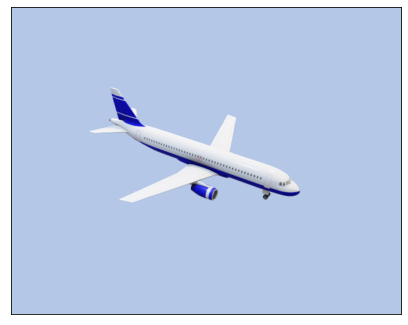

In [21]:
img = cv.imread('bank_images/test14.png')

# View on Matplotlib
rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.figure(figsize=(7,6))
plt.imshow(rgb_img), plt.xticks([]), plt.yticks([])

(<matplotlib.image.AxesImage at 0x24cd58e3e88>, ([], []), ([], []))

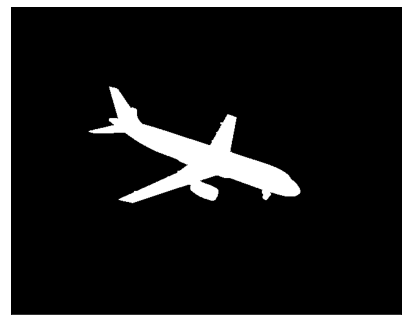

In [22]:
# Track blue background
lower_limit = np.array([[[231, 199, 180]]])
upper_limit = np.array([[[231, 199, 180]]])
mask = cv.inRange(img,lower_limit, upper_limit)
res = cv.bitwise_and(img,img, mask=mask)

# Convert to a binary image and invert mask
gray_res = cv.cvtColor(res, cv.COLOR_BGR2GRAY)
not_gray_res = cv.bitwise_not(gray_res)

# View on Matplotlib
plt.figure(figsize=(7,6))
plt.imshow(not_gray_res, cmap='gray'), plt.xticks([]), plt.yticks([])

(<matplotlib.image.AxesImage at 0x24cd598cd48>, ([], []), ([], []))

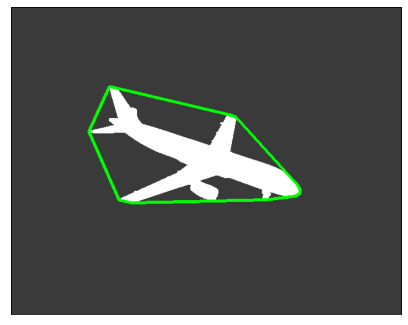

In [26]:
# Find contours and get convexHull()
ret,thresh = cv.threshold(not_gray_res, 127, 255, 0)
contours,hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

# Colorise so that contour lines can be seen (and view on Matplotlib)
rgb_not_gray_res = cv.cvtColor(not_gray_res, cv.COLOR_GRAY2RGB)
hull = cv.convexHull(contours[0])
cv.drawContours(rgb_not_gray_res, [hull], -1, (0,255,0), 3)
plt.figure(figsize=(7,6))
plt.imshow(rgb_not_gray_res), plt.xticks([]), plt.yticks([])

(<matplotlib.image.AxesImage at 0x24cd59d84c8>, ([], []), ([], []))

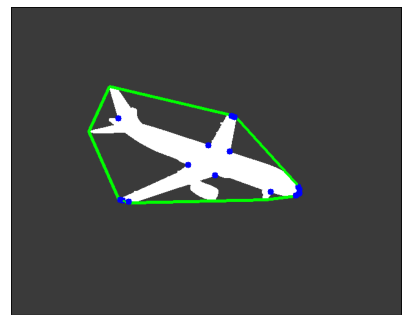

In [28]:
# Repeat convexHull() and find defects
cnt = contours[0]
hull = cv.convexHull(cnt, returnPoints=False)
defects = cv.convexityDefects(cnt,hull)
for i in range(defects.shape[0]):
    s,e,f,d = defects[i,0]
    start = tuple(cnt[s][0])
    end = tuple(cnt[e][0])
    far = tuple(cnt[f][0])
    cv.line(rgb_not_gray_res, start, end, [0,255,0],2)
    cv.circle(rgb_not_gray_res, far, 5, [0,0,255], -1)
    
plt.figure(figsize=(7,6))
plt.imshow(rgb_not_gray_res), plt.xticks([]), plt.yticks([])

For more, see https://docs.opencv.org/3.4/d5/d45/tutorial_py_contours_more_functions.html

***Hierarchy***

This tells us how the contours are related to one another [Next, Previous, First_Child, Parent]. We have already encountered <code>cv.RETR_TREE</code>:

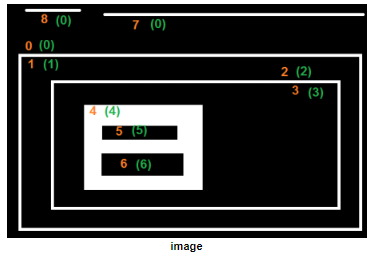


But we could have gone for:

<code>cv.RETR_CCOMP</code>

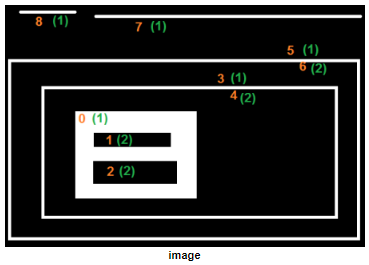

<code>cv.RETR_EXTERNAL</code>, which only returns the outer contours; all child contours are left behind.

<code>cv.RETR_LIST</code>, the simplest of the four flags; although it returns all the contours, it does not create any parent-child relationships.

For more, see https://docs.opencv.org/3.4/d9/d8b/tutorial_py_contours_hierarchy.html